<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 1403/2000
1/1 [==============================] - 0s 2ms/step - loss: 74.0470 - root_mean_squared_error: 8.6051
Epoch 1404/2000
1/1 [==============================] - 0s 1ms/step - loss: 74.0404 - root_mean_squared_error: 8.6047
Epoch 1405/2000
1/1 [==============================] - 0s 1ms/step - loss: 74.0337 - root_mean_squared_error: 8.6043
Epoch 1406/2000
1/1 [==============================] - 0s 1ms/step - loss: 74.0271 - root_mean_squared_error: 8.6039
Epoch 1407/2000
1/1 [==============================] - ETA: 0s - loss: 74.0204 - root_mean_squared_error: 8.60 - 0s 2ms/step - loss: 74.0204 - root_mean_squared_error: 8.6035
Epoch 1408/2000
1/1 [==============================] - 0s 2ms/step - loss: 74.0138 - root_mean_squared_error: 8.6031
Epoch 1409/2000
1/1 [==============================] - 0s 1ms/step - loss: 74.0071 - root_mean_squared_error: 8.6027
Epoch 1410/2000
1/1 [==============================] - 0s 1ms/step - loss: 74.0004 - root_mean_squared_error: 8.6024
Epoch 

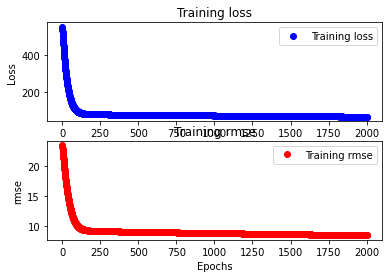

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
TEST_DATA = [[0.06, 0., 7.09, 0., 0.5, 6.5, 77.0, 5., 2., 220., 18.0, 396.99, 5.3]]

## 데이터 읽어오기.
raw_df = pd.read_csv("../dataset/BostonHousing.csv")

print(raw_df.info())
print(raw_df.head())

dataset=raw_df.copy()
label_data=dataset.pop("MEDV")

# 모델의 설정
input_Layer = tf.keras.layers.Input(shape=(13,))
x = tf.keras.layers.Dense(200, activation='sigmoid')(input_Layer)
x= tf.keras.layers.Dense(2, activation='sigmoid')(x)
x= tf.keras.layers.Dense(100, activation='sigmoid')(x)
Out_Layer= tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()

loss=tf.keras.losses.mean_squared_error
optimizer=tf.keras.optimizers.SGD(learning_rate=0.0003)
metrics=tf.keras.metrics.RootMeanSquaredError()
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=[metrics])

result=model.fit(dataset, label_data, epochs=2000, batch_size=1000)
## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 알 수 있다.
print(model.weights)
print(result.history.keys())
print("predict = ", model.predict(TEST_DATA))

### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = result.history['loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 root_mean_squared_error  key를 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### root_mean_squared_error  key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'ro', label='Training rmse')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(dataset, label_data)[1]))
plt.show()